## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [36]:
# Your code here - remember to use markdown cells for comments as well!

In [37]:
import zipfile as zf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [38]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [65]:
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [40]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [41]:
movie_gross.isna().sum()

#Since there are only 5 films out of 3,387 that are missing a studio, we are going to drop those from our dataset. 
#Additionally, we are going to drop the 28 films that are missing a domestic gross.

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [42]:
movie_cleaned = movie_gross.dropna(subset=['studio', 'domestic_gross'])
movie_cleaned.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [43]:
#Change foreign gross from object to integer
#movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].astype('float')
#movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0).astype(float)

movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [44]:
movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0)

movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].str.replace(',', '')
movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].astype(float)

<ipython-input-44-8073a48d9429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0)
<ipython-input-44-8073a48d9429>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].str.replace(',', '')
<ipython-input-44-8073a48d9429>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [61]:
movie_cleaned.sort_values(by='domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2757,Satanic,Magn.,300.0,NaN,2016
2756,News From Planet Mars,KL,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000.0,2012
...,...,...,...,...,...
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3080,Black Panther,BV,700100000.0,646900000.0,2018


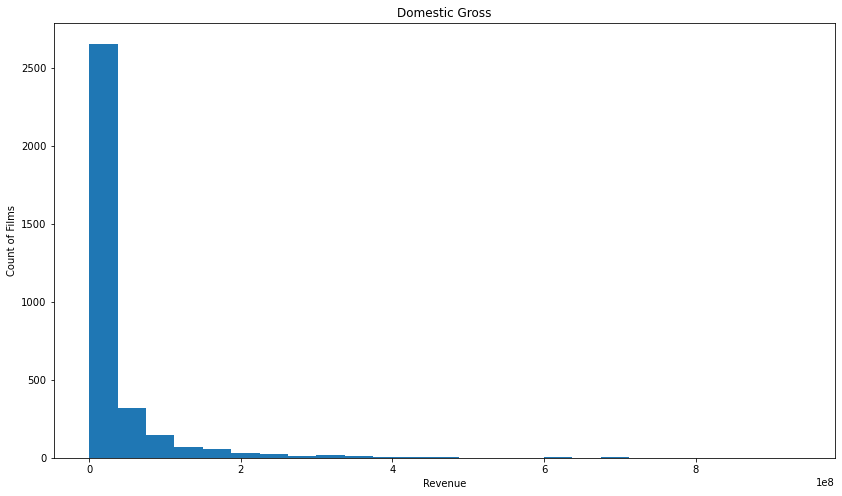

In [47]:
fig, ax = plt.subplots(figsize=(14,8))

ax.hist(movie_cleaned['domestic_gross'], bins = 25)
plt.title("Domestic Gross")
plt.xlabel("Revenue")
plt.ylabel('Count of Films');

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


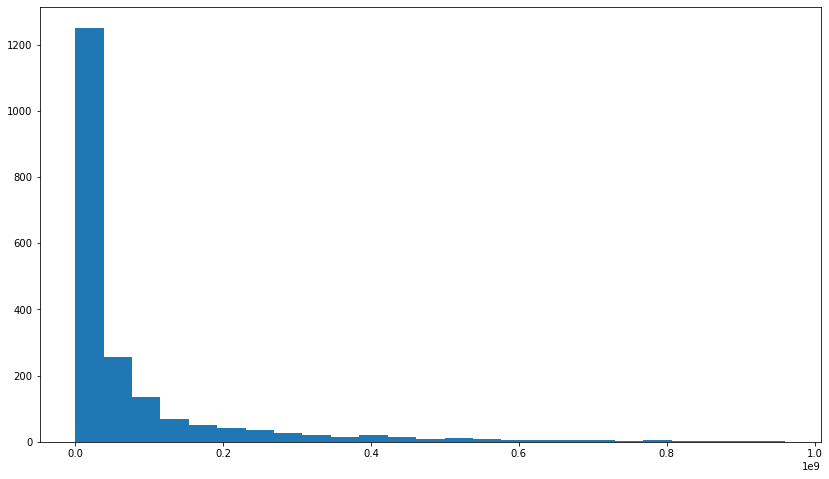

In [48]:
fig, ax = plt.subplots(figsize=(14,8))

ax.hist(movie_cleaned['foreign_gross'], bins = 25);

In [49]:
conn = sqlite3.connect('zippedData\im.db')

In [50]:
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [51]:
pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [52]:
IM_DB = pd.read_sql("""
SELECT *
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
""", conn)

In [53]:
IM_DB

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [54]:
ratings_and_gross = pd.merge(IM_DB, movie_cleaned, left_on = ['primary_title', 'start_year'], right_on = ['title', 'year'])

In [55]:
ratings_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1836
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1837 non-null   object 
 1   averagerating    1837 non-null   float64
 2   numvotes         1837 non-null   int64  
 3   primary_title    1837 non-null   object 
 4   original_title   1837 non-null   object 
 5   start_year       1837 non-null   int64  
 6   runtime_minutes  1833 non-null   float64
 7   genres           1835 non-null   object 
 8   title            1837 non-null   object 
 9   studio           1837 non-null   object 
 10  domestic_gross   1837 non-null   float64
 11  foreign_gross    1259 non-null   float64
 12  year             1837 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 200.9+ KB


In [56]:
ratings_and_gross

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,tt2908856,6.3,8016,My Old Lady,My Old Lady,2014,107.0,"Comedy,Drama,Romance",My Old Lady,Cohen,4000000.0,NaN,2014
1833,tt2980210,6.1,36062,A Hologram for the King,A Hologram for the King,2016,98.0,"Comedy,Drama,Romance",A Hologram for the King,RAtt.,4200000.0,NaN,2016
1834,tt3142688,5.8,5841,Finding Fanny,Finding Fanny,2014,102.0,"Adventure,Comedy,Drama",Finding Fanny,FIP,616000.0,7100000.0,2014
1835,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Hitchcock/Truffaut,Cohen,260000.0,NaN,2015


In [57]:
ratings_and_gross['genres'].value_counts()

Drama                         94
Comedy,Drama,Romance          90
Comedy,Drama                  71
Adventure,Animation,Comedy    68
Drama,Romance                 60
                              ..
Crime,Documentary,Drama        1
Comedy,Drama,War               1
Biography,History,Thriller     1
Comedy,Drama,History           1
Action,Comedy,Mystery          1
Name: genres, Length: 261, dtype: int64

In [58]:
#Because it is hard to interpret 261 different combinations of genres, I am going to break them out

ratings_and_gross[['Genre 1', 'Genre 2', 'Genre 3']] = ratings_and_gross['genres'].str.split(',', expand=True)

In [59]:
ratings_and_gross.sort_values(by=['domestic_gross'], ascending=False).head(20)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Genre 1,Genre 2,Genre 3
274,tt1825683,7.3,516148,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000.0,2018,Action,Adventure,Sci-Fi
1806,tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,1369.5,2018,Action,Adventure,Sci-Fi
212,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,Action,Adventure,Sci-Fi
171,tt2527336,7.1,462903,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,Action,Adventure,Fantasy
1229,tt3606756,7.7,203510,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 2,BV,608600000.0,634200000.0,2018,Action,Adventure,Animation
1718,tt3748528,7.8,478592,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,Action,Adventure,Sci-Fi
1763,tt2277860,7.3,213542,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory,BV,486300000.0,542300000.0,2016,Adventure,Animation,Comedy
1686,tt2395427,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,Action,Adventure,Sci-Fi
256,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",The Dark Knight Rises,WB,448100000.0,636800000.0,2012,Action,Thriller,None
852,tt1951264,7.5,575455,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",The Hunger Games: Catching Fire,LGF,424700000.0,440300000.0,2013,Action,Adventure,Sci-Fi


In [135]:
box_office_hits = ratings_and_gross[ratings_and_gross['domestic_gross'] > 50000000]

len(box_office_hits)

473

In [158]:
genres = list(set(box_office_hits['Genre 1']))
count1 = box_office_hits['Genre 1'].value_counts(dropna=True)
count2 = box_office_hits['Genre 2'].value_counts(dropna=True)
count3 = box_office_hits['Genre 3'].value_counts(dropna=True)

count1
#print(count2)
#print(count3)

Action         188
Adventure       92
Comedy          83
Drama           41
Biography       29
Horror          18
Crime           11
Animation        4
Mystery          3
Documentary      2
Romance          1
Name: Genre 1, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a NoneType

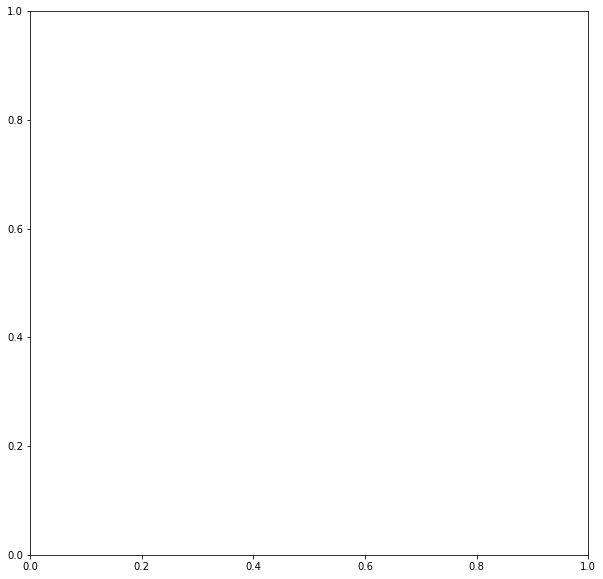

In [145]:
fig, ax = plt.subplots(figsize=(10,10))

ax.barh(genres, width = counts);

<AxesSubplot:>

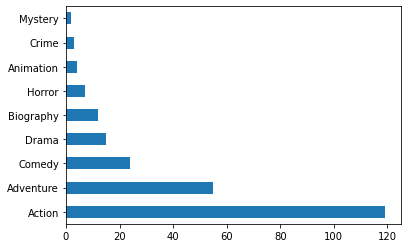

In [94]:
box_office_hits['Genre 1'].value_counts().plot.barh()